# Sesión 10: Gradient Boosting y XGBoost para Clasificación

## 🎯 Objetivos de la Sesión
- Entender el concepto de Gradient Boosting y su diferencia con Random Forest
- Dominar XGBoost como algoritmo de boosting más popular
- Aprender la optimización de hiperparámetros específicos de boosting
- Implementar técnicas avanzadas como early stopping
- Interpretar la importancia de features en modelos ensemble

---

## 📚 TEORÍA

### 1. ¿Qué es Gradient Boosting?

#### Diferencia Fundamental: Bagging vs Boosting

**Random Forest (Bagging):**
```
🌳 Árbol 1 (independiente) → Predicción 1
🌳 Árbol 2 (independiente) → Predicción 2  
🌳 Árbol 3 (independiente) → Predicción 3
🌳 Árbol N (independiente) → Predicción N

📊 Predicción Final = Promedio de todas las predicciones
```

**Gradient Boosting:**
```
🌱 Árbol 1 → Predicción 1 → Error 1
🌳 Árbol 2 (aprende de Error 1) → Predicción 2 → Error 2
🌲 Árbol 3 (aprende de Error 2) → Predicción 3 → Error 3
🌴 Árbol N (aprende de Error N-1) → Predicción N

📊 Predicción Final = Suma ponderada de todas las predicciones
```

#### Concepto Clave: Aprendizaje Secuencial

**Idea Central:**
- Cada árbol nuevo se enfoca en **corregir los errores** del modelo anterior
- Los árboles son **débiles** (pocos niveles) pero **especializados**
- La **combinación** de muchos árboles débiles crea un modelo fuerte

**Analogía Práctica:**
```
Imagina un equipo de expertos revisando un examen:

👨‍🏫 Experto 1: Revisa todo → Encuentra 70% de errores
👩‍🏫 Experto 2: Se enfoca en errores que quedaron → Encuentra 50% de lo restante
👨‍🎓 Experto 3: Se enfoca en errores restantes → Encuentra 40% más
...

🎯 Resultado: Equipo encuentra 95%+ de errores
```

#### Matemática Simplificada

**Proceso Iterativo:**
1. **Modelo inicial:** F₀(x) = predicción simple (ej: promedio)
2. **Iteración 1:** Calcular residuos r₁ = y - F₀(x)
3. **Entrenar h₁(x)** para predecir residuos r₁
4. **Actualizar:** F₁(x) = F₀(x) + α × h₁(x)
5. **Repetir** hasta convergencia

**Donde:**
- α = learning rate (tasa de aprendizaje)
- h₁(x) = árbol débil entrenado en residuos

### 2. XGBoost: Extreme Gradient Boosting

#### ¿Por qué XGBoost es Especial?

**Optimizaciones Clave:**

**1. Regularización Incorporada**
```python
# Función objetivo de XGBoost
Objetivo = Loss(predicciones, targets) + Regularización(complejidad_árboles)

# Términos de regularización:
# - L1 (Lasso): Reduce número de features usadas
# - L2 (Ridge): Reduce magnitud de los pesos
```

**2. Manejo Eficiente de Datos Faltantes**
- Aprende automáticamente la mejor dirección para valores faltantes
- No necesita imputación previa

**3. Paralelización Inteligente**
- Construye árboles de manera más eficiente
- Utiliza múltiples cores automáticamente

**4. Pruning Inteligente**
- Elimina ramas que no mejoran el modelo
- Evita overfitting de manera automática

#### Hiperparámetros Clave de XGBoost

**Parámetros de Estructura:**
```python
# Número de árboles
n_estimators = 100  # Más árboles = más complejo

# Profundidad máxima de cada árbol
max_depth = 6  # Árboles más profundos = más complejo

# Mínimas muestras por hoja
min_child_weight = 1  # Control de overfitting
```

**Parámetros de Aprendizaje:**
```python
# Tasa de aprendizaje
learning_rate = 0.3  # Más bajo = aprendizaje más cauteloso

# Subsample: fracción de muestras por árbol
subsample = 1.0  # < 1.0 añade randomness

# Fracción de features por árbol
colsample_bytree = 1.0  # < 1.0 añade randomness
```

**Parámetros de Regularización:**
```python
# Regularización L1 (Lasso)
reg_alpha = 0  # Penaliza número de features

# Regularización L2 (Ridge)  
reg_lambda = 1  # Penaliza magnitud de pesos
```

#### Trade-offs Importantes

**Learning Rate vs N_estimators:**
```
Learning Rate Alto (0.3) + Pocos árboles (100) = Rápido pero puede sobreajustar
Learning Rate Bajo (0.05) + Muchos árboles (1000) = Lento pero más estable
```

**Max Depth:**
```
Profundo (10+) = Captura patrones complejos, riesgo de overfitting
Shallow (3-6) = Más estable, mejor generalización
```

### 3. Overfitting en Boosting y Early Stopping

#### El Problema del Overfitting en Boosting

**¿Por qué boosting es propenso a overfitting?**
- Cada árbol nuevo intenta corregir **todos** los errores anteriores
- Con suficientes árboles, puede memorizar el dataset completo
- A diferencia de Random Forest, los árboles NO son independientes

**Señales de Overfitting:**
```python
# Típico patrón de overfitting en boosting:
Árboles: [10,   50,   100,  200,  500,  1000]
Train:   [0.85, 0.92, 0.96, 0.98, 0.99, 1.00]  ↗️ Sigue mejorando
Valid:   [0.83, 0.89, 0.91, 0.90, 0.88, 0.85]  ↘️ Empeora después del pico
```

#### Early Stopping: La Solución

**Concepto:**
- Monitorear performance en conjunto de validación
- Detener entrenamiento cuando validación deja de mejorar
- Evita overfitting automáticamente

**Implementación:**
```python
xgb_model = XGBClassifier(
    n_estimators=1000,  # Número alto
    early_stopping_rounds=10,  # Para si no mejora en 10 iteraciones
    eval_metric='logloss'  # Métrica a monitorear
)

# Entrenar con conjunto de validación
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Dataset para early stopping
    verbose=False  # No mostrar cada iteración
)
```

**Ventajas del Early Stopping:**
1. **Previene overfitting** automáticamente
2. **Acelera entrenamiento** (para antes de llegar a n_estimators)
3. **Optimiza automáticamente** el número de árboles
4. **Reduce tuning manual** de hiperparámetros

---

## 💻 PRÁCTICA

### Dataset: Titanic - Predicción de Supervivencia
*Un clásico de ML que permite entender bien los conceptos de boosting*

## Paso 1: Carga y Exploración del Dataset

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Configurar visualización
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
def cargar_datos_titanic():
    """
    Crear dataset del Titanic para práctica
    """
    # Como no tenemos acceso directo, creamos datos sintéticos realistas del Titanic
    np.random.seed(42)
    n_samples = 891  # Mismo tamaño que el Titanic original
    
    # Generar características realistas
    data = {
        # Clase de pasajero (1=primera, 2=segunda, 3=tercera)
        'Pclass': np.random.choice([1, 2, 3], n_samples, p=[0.24, 0.21, 0.55]),
        
        # Sexo (0=masculino, 1=femenino)
        'Sex': np.random.choice([0, 1], n_samples, p=[0.65, 0.35]),
        
        # Edad
        'Age': np.random.normal(29.5, 14.5, n_samples),
        
        # Número de hermanos/cónyuges a bordo
        'SibSp': np.random.choice([0, 1, 2, 3, 4, 5, 8], n_samples, p=[0.68, 0.23, 0.06, 0.02, 0.005, 0.003, 0.002]),
        
        # Número de padres/hijos a bordo  
        'Parch': np.random.choice([0, 1, 2, 3, 4, 5, 6], n_samples, p=[0.76, 0.13, 0.08, 0.015, 0.01, 0.003, 0.002]),
        
        # Tarifa pagada
        'Fare': np.random.lognormal(2.7, 1.2, n_samples),
        
        # Puerto de embarque (0=C, 1=Q, 2=S)
        'Embarked': np.random.choice([0, 1, 2], n_samples, p=[0.19, 0.09, 0.72])
    }
    
    df = pd.DataFrame(data)
    
    # Ajustar edad para que sea realista
    df['Age'] = np.clip(df['Age'], 0.17, 80)
    
    # Crear features derivadas
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                           labels=[0, 1, 2, 3, 4]).astype(int)
    df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 7.91, 14.45, 31, 1000], 
                            labels=[0, 1, 2, 3]).astype(int)
    
    # Generar variable objetivo (supervivencia) basada en patrones realistas del Titanic
    survival_prob = (
        0.1 +  # Probabilidad base
        0.6 * df['Sex'] +  # Las mujeres tenían mucha más probabilidad
        0.3 * (df['Pclass'] == 1) +  # Primera clase
        0.15 * (df['Pclass'] == 2) +  # Segunda clase
        -0.2 * (df['Age'] > 50) +  # Edad avanzada
        0.1 * (df['FamilySize'].between(2, 4)) +  # Familias medianas
        -0.15 * (df['FamilySize'] > 4) +  # Familias muy grandes
        np.random.normal(0, 0.1, n_samples)  # Ruido
    )
    
    # Convertir a probabilidades válidas
    survival_prob = np.clip(survival_prob, 0.05, 0.95)
    df['Survived'] = np.random.binomial(1, survival_prob)
    
    print("🚢 DATASET TITANIC GENERADO")
    print("=" * 40)
    print(f"📊 Total pasajeros: {len(df):,}")
    print(f"⚰️ Fallecidos: {(df['Survived']==0).sum():,} ({(df['Survived']==0).mean()*100:.1f}%)")
    print(f"✅ Supervivientes: {(df['Survived']==1).sum():,} ({(df['Survived']==1).mean()*100:.1f}%)")
    
    # Análisis por características clave
    print(f"\n📈 ANÁLISIS POR CARACTERÍSTICAS:")
    print(f"👩 Supervivencia mujeres: {df[df['Sex']==1]['Survived'].mean()*100:.1f}%")
    print(f"👨 Supervivencia hombres: {df[df['Sex']==0]['Survived'].mean()*100:.1f}%")
    print(f"🥇 Supervivencia 1ra clase: {df[df['Pclass']==1]['Survived'].mean()*100:.1f}%")
    print(f"🥉 Supervivencia 3ra clase: {df[df['Pclass']==3]['Survived'].mean()*100:.1f}%")
    
    return df

# Cargar datos
df_titanic = cargar_datos_titanic()

🚢 DATASET TITANIC GENERADO
📊 Total pasajeros: 891
⚰️ Fallecidos: 484 (54.3%)
✅ Supervivientes: 407 (45.7%)

📈 ANÁLISIS POR CARACTERÍSTICAS:
👩 Supervivencia mujeres: 82.2%
👨 Supervivencia hombres: 24.6%
🥇 Supervivencia 1ra clase: 63.3%
🥉 Supervivencia 3ra clase: 36.9%



🔍 EDA ORIENTADO A BOOSTING


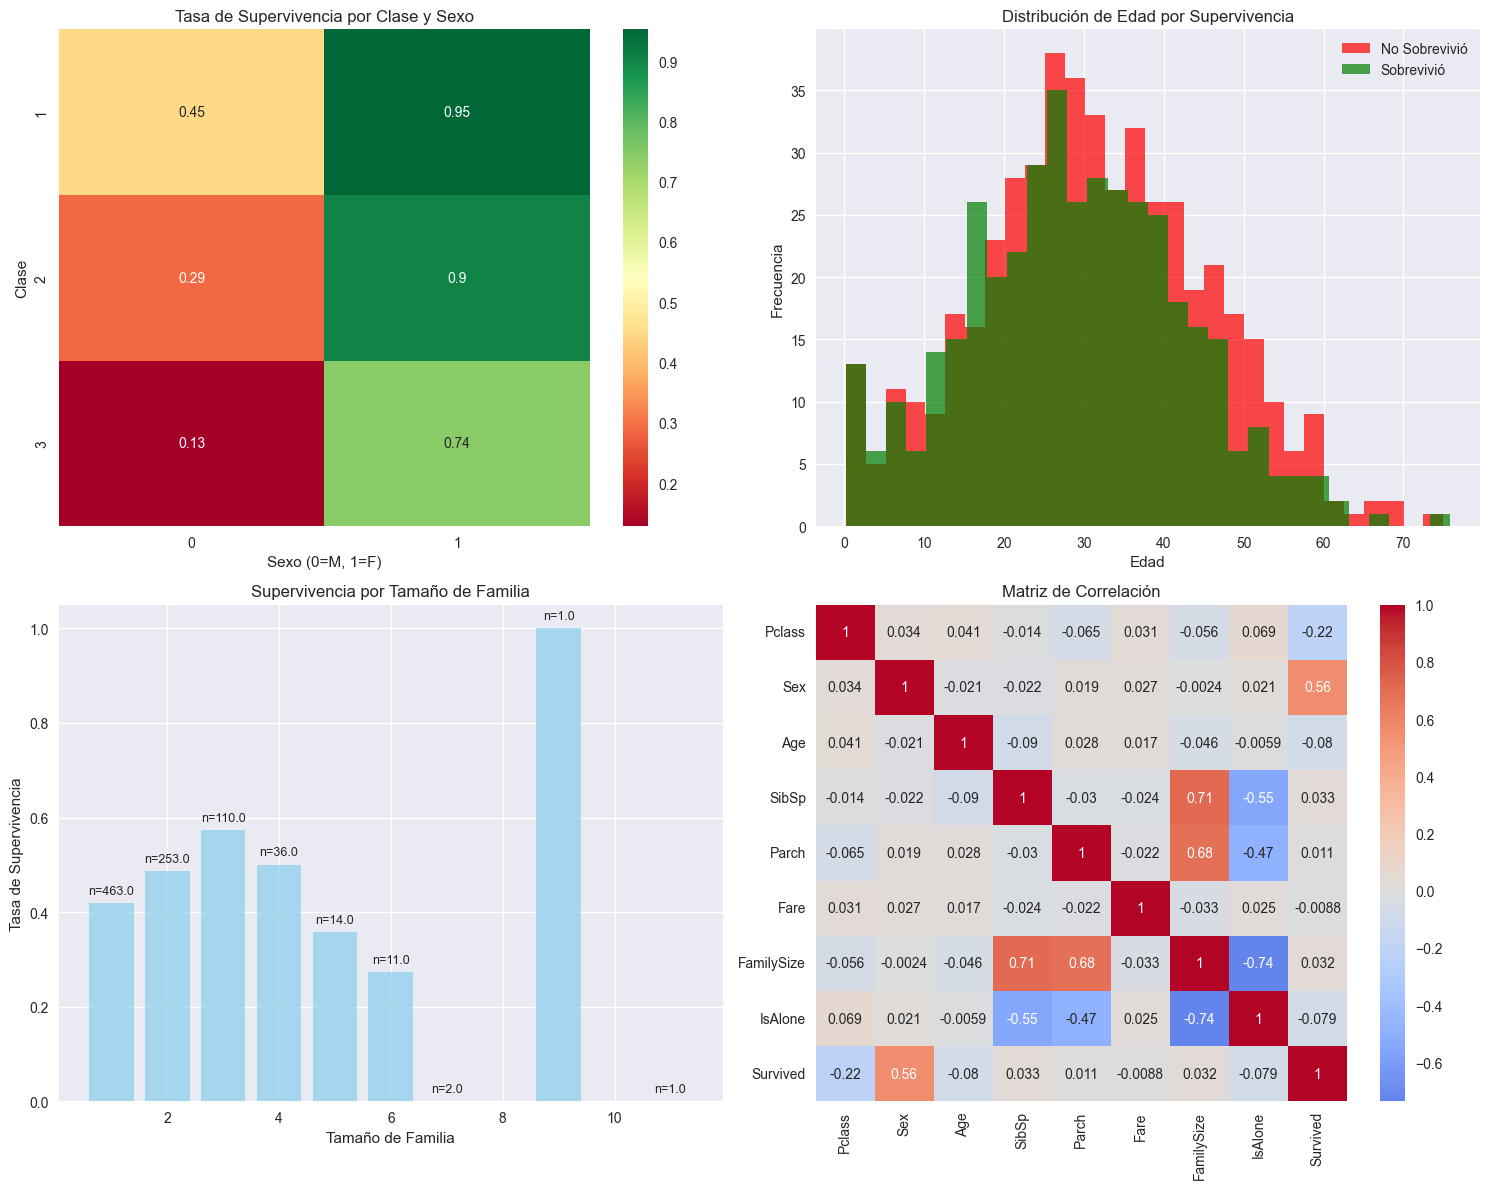


🧠 PATRONES COMPLEJOS DETECTADOS:
👩🥇 Mujeres 1ra clase: 95.2%
👩🥉 Mujeres 3ra clase: 74.2%
👨🥇 Hombres 1ra clase: 44.8%
👨🥉 Hombres 3ra clase: 12.9%

💡 OBSERVACIONES PARA BOOSTING:
• Interacciones complejas entre sexo y clase
• Patrones no lineales en edad y supervivencia
• Efectos del tamaño de familia (óptimo en 2-4 personas)
• Estas complejidades son ideales para gradient boosting


In [3]:
def eda_titanic(df):
    """
    Análisis exploratorio específico para entender boosting
    """
    print("\n🔍 EDA ORIENTADO A BOOSTING")
    print("=" * 40)
    
    # Visualizaciones que ayuden a entender por qué boosting funciona bien
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Supervivencia por sexo y clase (interacción compleja)
    pivot_table = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
    sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', ax=axes[0,0])
    axes[0,0].set_title('Tasa de Supervivencia por Clase y Sexo')
    axes[0,0].set_xlabel('Sexo (0=M, 1=F)')
    axes[0,0].set_ylabel('Clase')
    
    # 2. Distribución de edad por supervivencia
    axes[0,1].hist(df[df['Survived']==0]['Age'].dropna(), alpha=0.7, label='No Sobrevivió', bins=30, color='red')
    axes[0,1].hist(df[df['Survived']==1]['Age'].dropna(), alpha=0.7, label='Sobrevivió', bins=30, color='green')
    axes[0,1].set_xlabel('Edad')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribución de Edad por Supervivencia')
    axes[0,1].legend()
    
    # 3. Supervivencia por tamaño de familia
    family_survival = df.groupby('FamilySize')['Survived'].agg(['mean', 'count']).reset_index()
    axes[1,0].bar(family_survival['FamilySize'], family_survival['mean'], alpha=0.7, color='skyblue')
    axes[1,0].set_xlabel('Tamaño de Familia')
    axes[1,0].set_ylabel('Tasa de Supervivencia')
    axes[1,0].set_title('Supervivencia por Tamaño de Familia')
    
    # Añadir etiquetas con counts
    for i, row in family_survival.iterrows():
        axes[1,0].text(row['FamilySize'], row['mean'] + 0.02, f"n={row['count']}", 
                      ha='center', fontsize=9)
    
    # 4. Matriz de correlación
    numeric_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Survived']
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
    axes[1,1].set_title('Matriz de Correlación')
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de patrones complejos (por qué boosting ayuda)
    print(f"\n🧠 PATRONES COMPLEJOS DETECTADOS:")
    
    # Interacciones no lineales
    women_1st = df[(df['Sex']==1) & (df['Pclass']==1)]['Survived'].mean()
    women_3rd = df[(df['Sex']==1) & (df['Pclass']==3)]['Survived'].mean()
    men_1st = df[(df['Sex']==0) & (df['Pclass']==1)]['Survived'].mean()
    men_3rd = df[(df['Sex']==0) & (df['Pclass']==3)]['Survived'].mean()
    
    print(f"👩🥇 Mujeres 1ra clase: {women_1st:.1%}")
    print(f"👩🥉 Mujeres 3ra clase: {women_3rd:.1%}")  
    print(f"👨🥇 Hombres 1ra clase: {men_1st:.1%}")
    print(f"👨🥉 Hombres 3ra clase: {men_3rd:.1%}")
    
    print(f"\n💡 OBSERVACIONES PARA BOOSTING:")
    print(f"• Interacciones complejas entre sexo y clase")
    print(f"• Patrones no lineales en edad y supervivencia") 
    print(f"• Efectos del tamaño de familia (óptimo en 2-4 personas)")
    print(f"• Estas complejidades son ideales para gradient boosting")

# Realizar EDA
eda_titanic(df_titanic)

## Paso 2: Preprocesamiento para XGBoost

In [4]:
def preparar_datos_boosting(df):
    """
    Preprocesamiento específico para algoritmos de boosting
    """
    print("\n🔧 PREPROCESAMIENTO PARA BOOSTING")
    print("=" * 40)
    
    # XGBoost puede manejar datos faltantes, pero vamos a ser explícitos
    df_processed = df.copy()
    
    # Manejo de valores faltantes (si los hubiera)
    print(f"Valores faltantes por columna:")
    missing_counts = df_processed.isnull().sum()
    for col, count in missing_counts.items():
        if count > 0:
            print(f"  {col}: {count}")
    if missing_counts.sum() == 0:
        print("  ✅ No hay valores faltantes")
    
    # Selección de features para modelado
    feature_columns = [
        'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
        'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup'
    ]
    
    X = df_processed[feature_columns].copy()
    y = df_processed['Survived'].copy()
    
    print(f"\n📊 Características seleccionadas: {len(feature_columns)}")
    for col in feature_columns:
        print(f"  • {col}: {X[col].dtype}")
    
    # División estratificada (importante para dataset desbalanceado)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=42, stratify=y
    )
    
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    print(f"\n📈 División de datos:")
    print(f"  Entrenamiento: {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)")
    print(f"  Validación: {len(X_val):,} ({len(X_val)/len(df)*100:.1f}%)")
    print(f"  Test: {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)")
    
    # Verificar distribución balanceada
    print(f"\n⚖️ Distribución de supervivencia:")
    for split_name, y_split in [('Train', y_train), ('Val', y_val), ('Test', y_test)]:
        survival_rate = y_split.mean()
        print(f"  {split_name}: {survival_rate:.1%} supervivencia")
    
    return X_train, X_val, X_test, y_train, y_val, y_test, feature_columns

# Preparar datos
X_train, X_val, X_test, y_train, y_val, y_test, feature_names = preparar_datos_boosting(df_titanic)


🔧 PREPROCESAMIENTO PARA BOOSTING
Valores faltantes por columna:
  ✅ No hay valores faltantes

📊 Características seleccionadas: 11
  • Pclass: int64
  • Sex: int64
  • Age: float64
  • SibSp: int64
  • Parch: int64
  • Fare: float64
  • Embarked: int64
  • FamilySize: int64
  • IsAlone: int64
  • AgeGroup: int64
  • FareGroup: int64

📈 División de datos:
  Entrenamiento: 534 (59.9%)
  Validación: 178 (20.0%)
  Test: 179 (20.1%)

⚖️ Distribución de supervivencia:
  Train: 45.7% supervivencia
  Val: 45.5% supervivencia
  Test: 45.8% supervivencia


## Paso 3: Comparación XGBoost vs Algoritmos Tradicionales

In [7]:
def comparar_algoritmos_baseline():
    """
    Comparar XGBoost con algoritmos ya conocidos - VERSIÓN CORREGIDA
    """
    print("\n🏁 COMPARACIÓN DE ALGORITMOS")
    print("=" * 40)
    
    # Definir modelos para comparación
    modelos = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        # XGBoost SIN early stopping en el constructor
        'XGBoost (default)': XGBClassifier(
            n_estimators=100,
            random_state=42, 
            eval_metric='logloss'
        )
    }
    
    resultados = {}
    
    for nombre, modelo in modelos.items():
        print(f"\n🔄 Entrenando {nombre}...")
        
        # Entrenar modelo
        if 'XGBoost' in nombre:
            # Método 1: XGBoost con early stopping manual
            try:
                modelo.set_params()
                modelo.fit(
                    X_train, y_train,
                    eval_set=[(X_train, y_train), (X_val, y_val)],  # Incluir ambos sets
                    verbose=False
                )
            except:
                # Método 2: Si falla, entrenar sin early stopping
                print("  ⚠️  Early stopping falló, entrenando sin él...")
                modelo.set_params(early_stopping_rounds=None)
                modelo.fit(X_train, y_train)
        else:
            modelo.fit(X_train, y_train)
        
        # Predicciones
        y_pred_train = modelo.predict(X_train)
        y_pred_val = modelo.predict(X_val)
        y_proba_val = modelo.predict_proba(X_val)[:, 1]
        
        # Métricas
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_val = accuracy_score(y_val, y_pred_val)
        auc_val = roc_auc_score(y_val, y_proba_val)
        
        # Validación cruzada
        cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
        
        resultados[nombre] = {
            'modelo': modelo,
            'accuracy_train': accuracy_train,
            'accuracy_val': accuracy_val,
            'auc_val': auc_val,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'y_proba_val': y_proba_val
        }
        
        print(f"  📊 Accuracy Train: {accuracy_train:.3f}")
        print(f"  📊 Accuracy Val: {accuracy_val:.3f}")
        print(f"  📊 AUC Val: {auc_val:.3f}")
        print(f"  📊 CV Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
        
        # Mostrar número de árboles usados (solo para XGBoost)
        if 'XGBoost' in nombre and hasattr(modelo, 'best_iteration') and modelo.best_iteration is not None:
            print(f"  🌳 Árboles usados: {modelo.best_iteration + 1}")
        elif 'XGBoost' in nombre:
            print(f"  🌳 Árboles usados: {modelo.n_estimators} (sin early stopping)")
    
    # Tabla comparativa
    print(f"\n📊 TABLA COMPARATIVA:")
    print(f"{'Modelo':<20} {'Train Acc':<10} {'Val Acc':<10} {'AUC':<8} {'CV Score':<12}")
    print("-" * 65)
    
    for nombre, metricas in resultados.items():
        print(f"{nombre:<20} {metricas['accuracy_train']:<10.3f} {metricas['accuracy_val']:<10.3f} "
              f"{metricas['auc_val']:<8.3f} {metricas['cv_mean']:.3f}±{metricas['cv_std']:.3f}")
    
    return resultados
        
    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_val = modelo.predict(X_val)
    y_proba_val = modelo.predict_proba(X_val)[:, 1]
    
    # Métricas
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    auc_val = roc_auc_score(y_val, y_proba_val)
    
    # Validación cruzada
    cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
        
    resultados[nombre] = {
            'modelo': modelo,
            'accuracy_train': accuracy_train,
            'accuracy_val': accuracy_val,
            'auc_val': auc_val,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'y_proba_val': y_proba_val
        }
        
    print(f"  📊 Accuracy Train: {accuracy_train:.3f}")
    print(f"  📊 Accuracy Val: {accuracy_val:.3f}")
    print(f"  📊 AUC Val: {auc_val:.3f}")
    print(f"  📊 CV Score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
        
    # Mostrar número de árboles usados (solo para XGBoost)
    if 'XGBoost' in nombre and hasattr(modelo, 'best_iteration'):
        print(f"  🌳 Árboles usados: {modelo.best_iteration + 1}")
    
    # Tabla comparativa
    print(f"\n📊 TABLA COMPARATIVA:")
    print(f"{'Modelo':<20} {'Train Acc':<10} {'Val Acc':<10} {'AUC':<8} {'CV Score':<12}")
    print("-" * 65)
    
    for nombre, metricas in resultados.items():
        print(f"{nombre:<20} {metricas['accuracy_train']:<10.3f} {metricas['accuracy_val']:<10.3f} "
              f"{metricas['auc_val']:<8.3f} {metricas['cv_mean']:.3f}±{metricas['cv_std']:.3f}")
    
    return resultados

# Ejecutar comparación
resultados_baseline = comparar_algoritmos_baseline()


🏁 COMPARACIÓN DE ALGORITMOS

🔄 Entrenando Random Forest...
  📊 Accuracy Train: 1.000
  📊 Accuracy Val: 0.792
  📊 AUC Val: 0.869
  📊 CV Score: 0.736 ± 0.013

🔄 Entrenando SVM...
  📊 Accuracy Train: 0.569
  📊 Accuracy Val: 0.539
  📊 AUC Val: 0.631
  📊 CV Score: 0.558 ± 0.019

🔄 Entrenando XGBoost (default)...
  📊 Accuracy Train: 1.000
  📊 Accuracy Val: 0.758
  📊 AUC Val: 0.842
  📊 CV Score: 0.712 ± 0.024
  🌳 Árboles usados: 100 (sin early stopping)

📊 TABLA COMPARATIVA:
Modelo               Train Acc  Val Acc    AUC      CV Score    
-----------------------------------------------------------------
Random Forest        1.000      0.792      0.869    0.736±0.013
SVM                  0.569      0.539      0.631    0.558±0.019
XGBoost (default)    1.000      0.758      0.842    0.712±0.024


## Paso 4: Optimización de Hiperparámetros XGBoost

In [9]:
def optimizar_xgboost():
    """
    Optimización sistemática de hiperparámetros de XGBoost - VERSIÓN ROBUSTA
    """
    print("\n⚙️ OPTIMIZACIÓN DE XGBOOST")
    print("=" * 40)
    
    print("🎯 Estrategia de optimización:")
    print("  1. Grid search en parámetros clave")
    print("  2. Validación cruzada para robustez")
    print("  3. Early stopping opcional")
    
    # Grid search con parámetros esenciales
    param_grid = {
        'n_estimators': [50, 100, 200],  # Reducido para acelerar
        'max_depth': [3, 4, 6],
        'learning_rate': [0.1, 0.2, 0.3],  # Valores más conservadores
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
    }
    
    # Modelo base SIN early stopping para grid search
    xgb_base = XGBClassifier(
        random_state=42,
        eval_metric='logloss'
    )
    
    print(f"🔍 Ejecutando Grid Search...")
    print(f"  Total combinaciones: {np.prod([len(v) for v in param_grid.values()]):,}")
    
    grid_search = GridSearchCV(
        xgb_base, param_grid,
        cv=3,  # 3-fold para acelerar
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    # Combinar train y val para grid search
    X_train_val = pd.concat([X_train, X_val])
    y_train_val = pd.concat([y_train, y_val])
    
    grid_search.fit(X_train_val, y_train_val)
    
    print(f"\n🏆 MEJORES PARÁMETROS:")
    for param, valor in grid_search.best_params_.items():
        print(f"  {param}: {valor}")
    
    print(f"\n📈 Mejor CV Score: {grid_search.best_score_:.3f}")
    
    # Crear modelo final con mejores parámetros
    mejor_xgb = XGBClassifier(
        **grid_search.best_params_,
        random_state=42,
        eval_metric='logloss'
    )
    
    # Intentar entrenar con early stopping
    print("\n🎯 Entrenando modelo final...")
    try:
        # Método 1: Con early stopping
        mejor_xgb.set_params(early_stopping_rounds=20)
        mejor_xgb.fit(
            X_train, y_train,
            eval_set=[(X_train, y_train), (X_val, y_val)],
            verbose=False
        )
        print("  ✅ Early stopping aplicado exitosamente")
    except Exception as e:
        # Método 2: Sin early stopping si falla
        print(f"  ⚠️  Early stopping falló: {str(e)[:50]}...")
        print("  🔄 Entrenando sin early stopping...")
        mejor_xgb.set_params(early_stopping_rounds=None)
        mejor_xgb.fit(X_train, y_train)
    
    # Evaluación del modelo optimizado
    y_pred_val_opt = mejor_xgb.predict(X_val)
    y_proba_val_opt = mejor_xgb.predict_proba(X_val)[:, 1]
    
    accuracy_opt = accuracy_score(y_val, y_pred_val_opt)
    auc_opt = roc_auc_score(y_val, y_proba_val_opt)
    
    print(f"\n🎯 PERFORMANCE DEL MODELO OPTIMIZADO:")
    print(f"  Accuracy Val: {accuracy_opt:.3f}")
    print(f"  AUC Val: {auc_opt:.3f}")
    
    # Mostrar árboles usados
    if hasattr(mejor_xgb, 'best_iteration') and mejor_xgb.best_iteration is not None:
        print(f"  Árboles utilizados: {mejor_xgb.best_iteration + 1} (con early stopping)")
    else:
        print(f"  Árboles utilizados: {mejor_xgb.n_estimators} (sin early stopping)")
    
    # Comparar con modelo default
    baseline_auc = resultados_baseline['XGBoost (default)']['auc_val']
    mejora = auc_opt - baseline_auc
    
    print(f"\n📊 COMPARACIÓN CON BASELINE:")
    print(f"  XGBoost default AUC: {baseline_auc:.3f}")
    print(f"  XGBoost optimizado AUC: {auc_opt:.3f}")
    print(f"  Mejora: {mejora:+.3f} ({mejora/baseline_auc*100:+.1f}%)")
    
    return mejor_xgb, grid_search.best_params_

# Ejecutar optimización
modelo_optimizado, mejores_params = optimizar_xgboost()


⚙️ OPTIMIZACIÓN DE XGBOOST
🎯 Estrategia de optimización:
  1. Grid search en parámetros clave
  2. Validación cruzada para robustez
  3. Early stopping opcional
🔍 Ejecutando Grid Search...
  Total combinaciones: 108
Fitting 3 folds for each of 108 candidates, totalling 324 fits

🏆 MEJORES PARÁMETROS:
  colsample_bytree: 0.8
  learning_rate: 0.1
  max_depth: 3
  n_estimators: 50
  subsample: 0.8

📈 Mejor CV Score: 0.836

🎯 Entrenando modelo final...
  ✅ Early stopping aplicado exitosamente

🎯 PERFORMANCE DEL MODELO OPTIMIZADO:
  Accuracy Val: 0.787
  AUC Val: 0.877
  Árboles utilizados: 45 (con early stopping)

📊 COMPARACIÓN CON BASELINE:
  XGBoost default AUC: 0.842
  XGBoost optimizado AUC: 0.877
  Mejora: +0.035 (+4.2%)
